## Descripción de la base de datos


La base WWBI es un conjunto de datos transnacional único creado por el Bureaucracy Lab del Banco Mundial. Su objetivo es mejorar la comprensión sobre el empleo público y su impacto en la economía y la gestión estatal, proporcionando evidencia empírica para políticas públicas.

## Estructura del dataset
La base se construye a partir de encuestas de hogares representativas a nivel nacional combinadas con datos administrativos, lo que le da una ventaja frente a métodos basados en percepciones.
•	Filas (observaciones): 61,004
•	Columnas (variables): 27
•	Tipo de datos:
o	4 columnas categóricas: Country Name, Country Code, Indicator Name, Indicator Code
o	23 columnas numéricas (años del 2000 al 2022)


## Librerias EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
# Install ace_tools if not already installed
#%pip install ace_tools
#import ace_tools as tools


## Agrupar países por regiones


In [2]:
df = pd.read_csv(r"..\data\raw\WWBICSV.csv")
df.head()
# Mostrar las primeras filas del DataFrame con la nueva columna 'region'
# Diccionario básico de países agrupados por región
region_map = {
    'Europa': [
        'Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Poland', 'Netherlands', 'Sweden', 'Norway', 'Finland',
        'Denmark', 'Portugal', 'Greece', 'Austria', 'Switzerland', 'Belgium', 'Ireland', 'Czech Republic', 'Hungary',
        'Slovakia', 'Slovenia', 'Romania', 'Bulgaria', 'Croatia', 'Serbia', 'Ukraine', 'Russia'
    ],
    'Asia': [
        'China', 'India', 'Japan', 'South Korea', 'Indonesia', 'Pakistan', 'Bangladesh', 'Vietnam', 'Thailand', 'Malaysia',
        'Philippines', 'Iran', 'Iraq', 'Afghanistan', 'Nepal', 'Sri Lanka', 'Myanmar', 'Kazakhstan', 'Uzbekistan'
    ],
    'Norte America': [
        'United States', 'Canada', 'Mexico'
    ],
    'Latinoamerica': [
        'Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay',
        'Panama', 'Costa Rica', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Cuba', 'Dominican Republic'
    ],
    'Oceania': [
        'Australia', 'New Zealand', 'Fiji', 'Papua New Guinea'
    ],
    'Africa': [
        'Nigeria', 'South Africa', 'Kenya', 'Ghana', 'Ethiopia', 'Egypt', 'Morocco', 'Algeria', 'Tanzania', 'Uganda',
        'Angola', 'Zimbabwe', 'Mozambique', 'Zambia', 'Senegal', 'Mali', 'Niger', 'Rwanda', 'Sudan', 'Chad'
    ]
}

# Crear función para mapear país a región
def get_region(country):
    for region, countries in region_map.items():
        if country in countries:
            return region
    return 'Otra'

# Aplicar función a la columna "Country Name"
df['region'] = df['Country Name'].apply(get_region)

# Mostrar las primeras filas del DataFrame con la nueva columna 'region'
df[['Country Name', 'region']].drop_duplicates().sort_values(by='region').head(50)










,Country Name,region
60702,Zimbabwe,Africa
16006,Egypt,Africa
17818,Ethiopia,Africa
19932,Ghana,Africa
26878,Kenya,Africa
60400,Zambia,Africa
32616,Mali,Africa
35938,Morocco,Africa
36240,Mozambique,Africa
38656,Niger,Africa


## Agrupacion de indicadores según palabras clave

In [3]:
# Definir función para clasificar indicadores en categorías por palabras clave
def clasificar_categoria(indicador):
    i = indicador.lower()
    if 'female' in i or 'gender' in i or 'male' in i:
        return 'Género'
    elif 'education' in i or 'teacher' in i or 'school' in i or 'university' in i:
        return 'Educación'
    elif 'occupation' in i or 'occupational' in i or 'worker' in i or 'official' in i:
        return 'Ocupación'
    elif 'health' in i or 'medical' in i or 'hospital' in i:
        return 'Salud'
    elif 'public administration' in i and 'core' not in i:
        return 'Administración pública'
    elif 'core public administration' in i:
        return 'Empleo público general'
    elif 'social security' in i:
        return 'Seguridad social'
    elif 'safety' in i or 'police' in i or 'judge' in i:
        return 'Seguridad pública'
    elif 'location' in i or 'urban' in i or 'rural' in i or 'region' in i:
        return 'Localización geográfica'
    else:
        return 'Otros'

# Aplicar función
df['Categoria Indicador'] = df['Indicator Name'].apply(clasificar_categoria)

# Mostrar ejemplos agrupados
df[['Indicator Name', 'Categoria Indicador']].drop_duplicates().sort_values(by='Categoria Indicador').head(50)

# Contar cuántos indicadores únicos hay por categoría
indicadores_por_categoria = df[['Indicator Name', 'Categoria Indicador']].drop_duplicates()
conteo_categorias = indicadores_por_categoria['Categoria Indicador'].value_counts().reset_index()
conteo_categorias.columns = ['Categoria Indicador', 'Cantidad de Indicadores']
conteo_categorias










,Categoria Indicador,Cantidad de Indicadores
0,Género,86
1,Educación,71
2,Ocupación,67
3,Otros,29
4,Salud,17
5,Seguridad social,8
6,Empleo público general,6
7,Administración pública,6
8,Seguridad pública,6
9,Localización geográfica,6


## Filtrar los países de la región LATAM

In [4]:
# Filtrar la los paises latinoamericanos
df_latam = df[df['region'] == 'Latinoamerica']
df_latam['Country Name'].unique()
# Imprime los indicadores unicos de df_latam
df_latam['Indicator Name'].unique()
df_latam
df_latam.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5134 entries, 1812 to 59493
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         5134 non-null   object 
 1   Country Code         5134 non-null   object 
 2   Indicator Name       5134 non-null   object 
 3   Indicator Code       5134 non-null   object 
 4   2000                 2081 non-null   float64
 5   2001                 2648 non-null   float64
 6   2002                 2723 non-null   float64
 7   2003                 2783 non-null   float64
 8   2004                 2783 non-null   float64
 9   2005                 2759 non-null   float64
 10  2006                 3162 non-null   float64
 11  2007                 2665 non-null   float64
 12  2008                 2677 non-null   float64
 13  2009                 2973 non-null   float64
 14  2010                 2052 non-null   float64
 15  2011                 2431 non-null   fl

## Filtrado latam por categoria genero

In [5]:
df_latam

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2015,2016,2017,2018,2019,2020,2021,2022,region,Categoria Indicador
1812,Argentina,ARG,"Core Public Administration workers, as a share...",BI.EMP.FRML.CA.PB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latinoamerica,Ocupación
1813,Argentina,ARG,"Core Public Administration workers, as a share...",BI.EMP.PWRK.CA.PB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latinoamerica,Ocupación
1814,Argentina,ARG,"Core Public Administration workers, as a share...",BI.EMP.TOTL.CA.PB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latinoamerica,Ocupación
1815,Argentina,ARG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.GE.SM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latinoamerica,Ocupación
1816,Argentina,ARG,Cross-country public sector pay comparison rat...,BI.PWK.CMPA.GE.MD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latinoamerica,Ocupación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59489,Venezuela,VEN,"Teachers, as a share of public formal employees",BI.EMP.FRML.TS.PB.ZS,NaN,NaN,NaN,NaN,NaN,0.160977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latinoamerica,Educación
59490,Venezuela,VEN,"Teachers, as a share of public paid employees",BI.EMP.PWRK.TS.PB.ZS,NaN,NaN,NaN,NaN,NaN,0.143744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latinoamerica,Educación
59491,Venezuela,VEN,"Teachers, as a share of public total employees",BI.EMP.TOTL.TS.PB.ZS,NaN,NaN,NaN,NaN,NaN,0.143742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latinoamerica,Educación
59492,Venezuela,VEN,Wage bill as a percentage of GDP,BI.WAG.TOTL.GD.ZS,4.069621,4.949865,4.623232,4.659728,4.226231,3.812815,...,3.416807,3.584378,3.584379,3.584379,0.358438,0.358438,0.358438,1.433752,Latinoamerica,Otros


In [6]:
# Filtrar la los paises latinoamericanos por la categoria de genero
df_latam_genero = df_latam[df_latam['Categoria Indicador'] == 'Género']
df_latam_genero['Country Name'].unique()
# Imprime los indicadores unicos de df_latam_genero
df_latam_genero['Indicator Name'].unique()
#imprime los valores unicos de la columna 'Indicator Name'
df_latam_genero['Indicator Name'].unique()


array(['Female to male wage ratio in the private sector (using mean)',
       'Female to male wage ratio in the private sector (using median)',
       'Female to male wage ratio in the public sector (using mean)',
       'Female to male wage ratio in the public sector (using median)',
       'Females, as a share of private paid employees',
       'Females, as a share of private paid employees by occupational group: Clerks',
       'Females, as a share of private paid employees by occupational group: Elementary occupation',
       'Females, as a share of private paid employees by occupational group: Managers',
       'Females, as a share of private paid employees by occupational group: Professionals',
       'Females, as a share of private paid employees by occupational group: Technicians',
       'Females, as a share of private paid employees by wage quintile: Quintile 1',
       'Females, as a share of private paid employees by wage quintile: Quintile 2',
       'Females, as a share o

## Boxplot de la evolución en el tiempo para los países de LATAM para un año específico

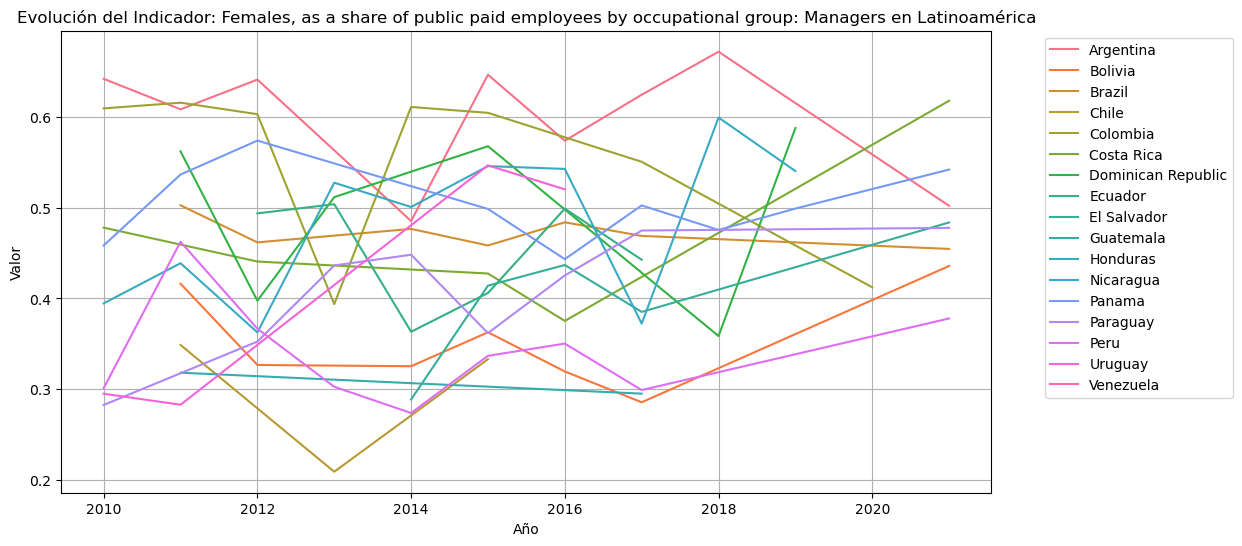

    Country Name         region  \
0      Argentina  Latinoamerica   
1        Bolivia  Latinoamerica   
2         Brazil  Latinoamerica   
3          Chile  Latinoamerica   
4       Colombia  Latinoamerica   
..           ...            ...   
199       Panama  Latinoamerica   
200     Paraguay  Latinoamerica   
201         Peru  Latinoamerica   
202      Uruguay  Latinoamerica   
203    Venezuela  Latinoamerica   

                                        Indicator Name  Year     Value  
0    Females, as a share of public paid employees b...  2010  0.641694  
1    Females, as a share of public paid employees b...  2010       NaN  
2    Females, as a share of public paid employees b...  2010       NaN  
3    Females, as a share of public paid employees b...  2010       NaN  
4    Females, as a share of public paid employees b...  2010  0.609120  
..                                                 ...   ...       ...  
199  Females, as a share of public paid employees b...  2021  0.5418

In [14]:
# Haz una funcion que Grafique la evolución en el tiempo (desde 2000 hasta 2022) de para los países de Latinoamérica para cierto indicador que sera aceptado como argumento
# no existe una columna 'Year' en el dataframe, pero se puede leer las columnas que tienen el año como nombre, y luego se puede hacer un melt para transformar el dataframe a un formato largo
def graficar_evolucion_indicador(df, indicador):
    # Filtrar el DataFrame para el indicador específico
    df_indicador = df[df['Indicator Name'] == indicador]

    # Obtener los años de las columnas
    anios = [str(a) for a in range(2010, 2022)]

    # Transformar el DataFrame a formato largo
    df_long = df_indicador.melt(id_vars=['Country Name', 'region', 'Indicator Name'], value_vars=anios, var_name='Year', value_name='Value')

    # Convertir la columna 'Year' a tipo numérico
    df_long['Year'] = pd.to_numeric(df_long['Year'])

    # Graficar la evolución del indicador por país
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_long, x='Year', y='Value', hue='Country Name')
    plt.title(f'Evolución del Indicador: {indicador} en Latinoamérica')
    plt.xlabel('Año')
    plt.ylabel('Valor')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()
    print(df_long)
# Llamar a la función para graficar un indicador específico, resaltar la tendencia del pais Ecuador
graficar_evolucion_indicador(df_latam, 'Females, as a share of public paid employees by occupational group: Managers')







## Función que grafique la evolución de un indicador para un país específico en Latinoamérica como argumento con respecto a la media de dicho indicador para la región

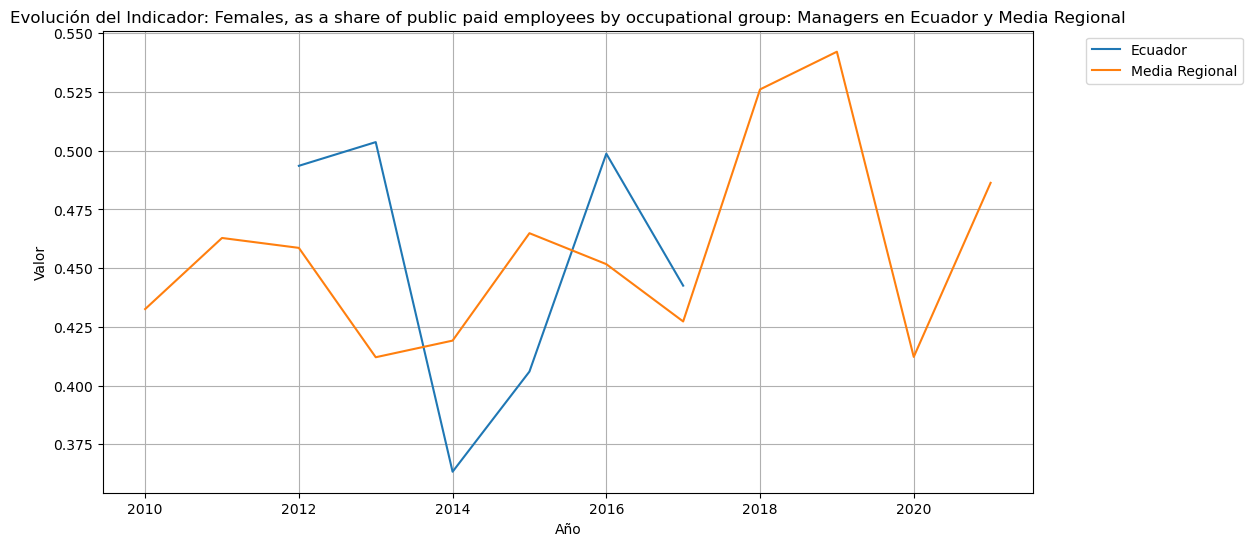

      Country Name         region  \
0          Ecuador  Latinoamerica   
1          Ecuador  Latinoamerica   
2          Ecuador  Latinoamerica   
3          Ecuador  Latinoamerica   
4          Ecuador  Latinoamerica   
5          Ecuador  Latinoamerica   
6          Ecuador  Latinoamerica   
7          Ecuador  Latinoamerica   
8          Ecuador  Latinoamerica   
9          Ecuador  Latinoamerica   
10         Ecuador  Latinoamerica   
11         Ecuador  Latinoamerica   
12  Media Regional            NaN   
13  Media Regional            NaN   
14  Media Regional            NaN   
15  Media Regional            NaN   
16  Media Regional            NaN   
17  Media Regional            NaN   
18  Media Regional            NaN   
19  Media Regional            NaN   
20  Media Regional            NaN   
21  Media Regional            NaN   
22  Media Regional            NaN   
23  Media Regional            NaN   

                                       Indicator Name  Year     Value  
0 

In [8]:
# desarolla una funciona que grafique la evolución de un indicador para un país específico en Latinoamérica como argumento y que en el mismo grafique la media de dicho indicador para la región
def graficar_evolucion_indicador_pais(df, indicador, pais):
    # Filtrar el DataFrame para el indicador específico
    df_indicador = df[df['Indicator Name'] == indicador]

    # Obtener los años de las columnas
    anios = [str(a) for a in range(2010, 2022)]

    # Transformar el DataFrame a formato largo
    df_long = df_indicador.melt(id_vars=['Country Name', 'region', 'Indicator Name'], value_vars=anios, var_name='Year', value_name='Value')

    # Convertir la columna 'Year' a tipo numérico
    df_long['Year'] = pd.to_numeric(df_long['Year'])

    # Filtrar por país específico
    df_pais = df_long[df_long['Country Name'] == pais]

    # Calcular la media de la región por año
    media_region = df_long.groupby('Year')['Value'].mean().reset_index()
    media_region['Country Name'] = 'Media Regional'

    # Concatenar los datos del país y la media regional
    df_plot = pd.concat([df_pais, media_region], ignore_index=True)

    # Graficar la evolución del indicador por país y la media regional
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_plot, x='Year', y='Value', hue='Country Name')
    plt.title(f'Evolución del Indicador: {indicador} en {pais} y Media Regional')
    plt.xlabel('Año')
    plt.ylabel('Valor')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()
    print(df_plot)

# Llamar a la función para graficar un indicador específico para un país
graficar_evolucion_indicador_pais(df_latam, indicador="Females, as a share of public paid employees by occupational group: Managers", pais="Ecuador")


# Verificaciones:

In [9]:
#imprime los valores del indicador "Females, as a share of public paid employees by occupational group: Managers" para el pais "Ecuador" en el dataframe df_latam

# Definir los años si no están definidos
anios = [str(a) for a in range(2010, 2022)]
myind =  "Females, as a share of public paid employees by occupational group: Managers" 
print(df_latam[(df_latam['Country Name'] == "Ecuador") & (df_latam['Indicator Name'] == myind)][["Indicator Name", "Country Name", "region"] + anios].drop_duplicates())

                                          Indicator Name Country Name  \
15754  Females, as a share of public paid employees b...      Ecuador   

              region  2010  2011      2012     2013      2014     2015  \
15754  Latinoamerica   NaN   NaN  0.493583  0.50368  0.363294  0.40595   

           2016      2017  2018  2019  2020  2021  
15754  0.498755  0.442543   NaN   NaN   NaN   NaN  


In [10]:
#En la tabla df_latam cuenta cuantos valores faltantes por columna tiene el dataframe y ordena de mayor a menor
df_latam.isnull().sum().sort_values(ascending=False)

2022                   5103
2020                   4819
2019                   4406
2018                   4399
2021                   4360
2013                   3515
2016                   3356
2014                   3085
2010                   3082
2000                   3053
2011                   2703
2017                   2634
2001                   2486
2007                   2469
2008                   2457
2002                   2411
2005                   2375
2004                   2351
2003                   2351
2015                   2321
2012                   2166
2009                   2161
2006                   1972
region                    0
Country Name              0
Country Code              0
Indicator Code            0
Indicator Name            0
Categoria Indicador       0
dtype: int64

## Boxplot con los indicadores "género" mas representativos


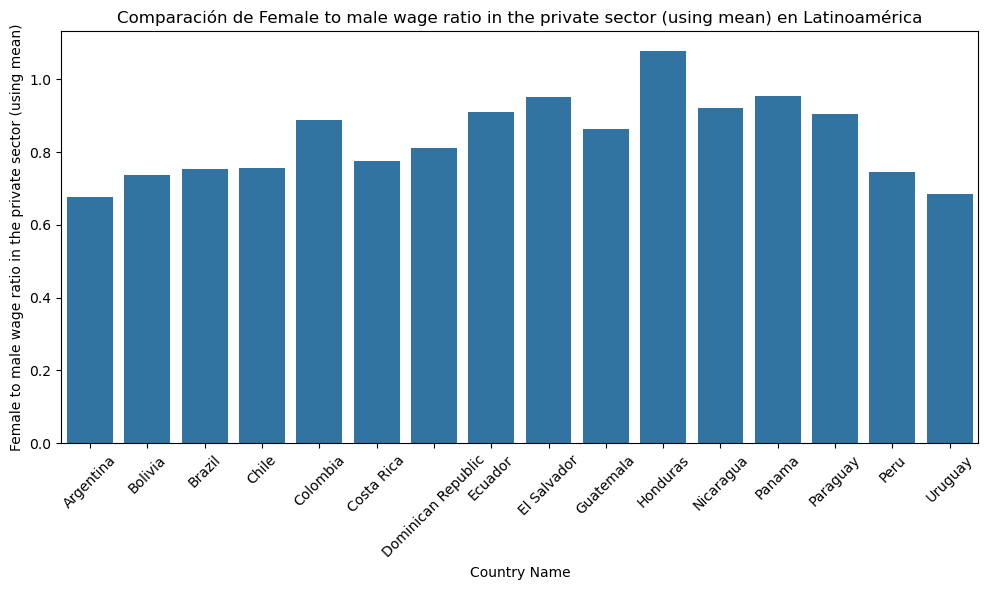

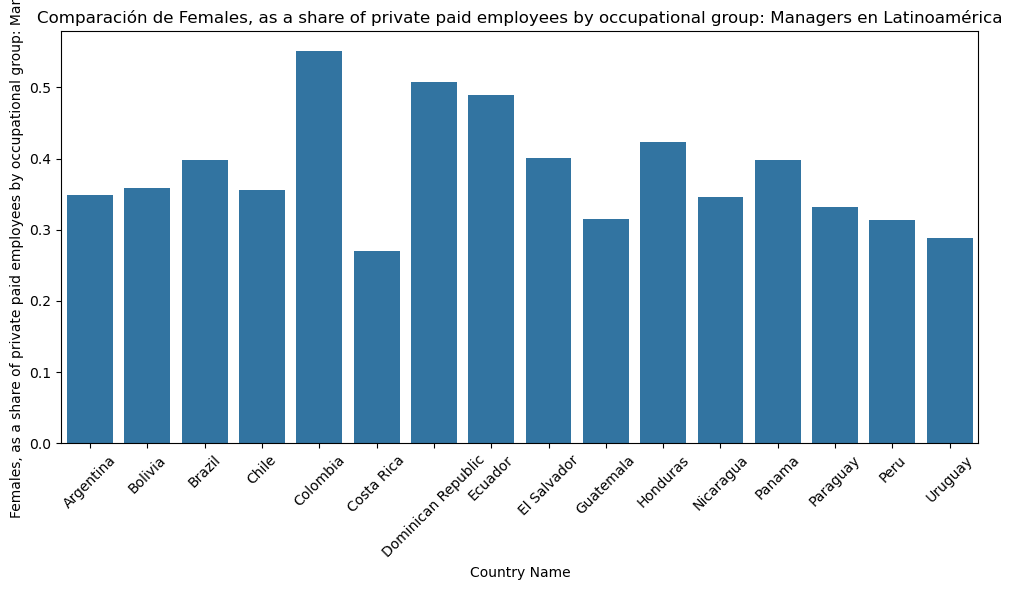

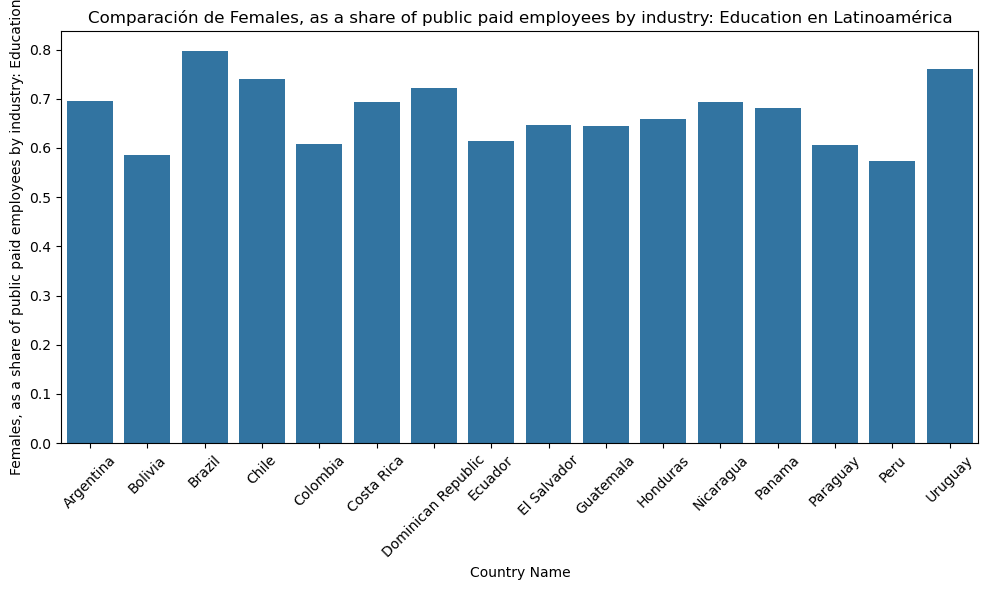

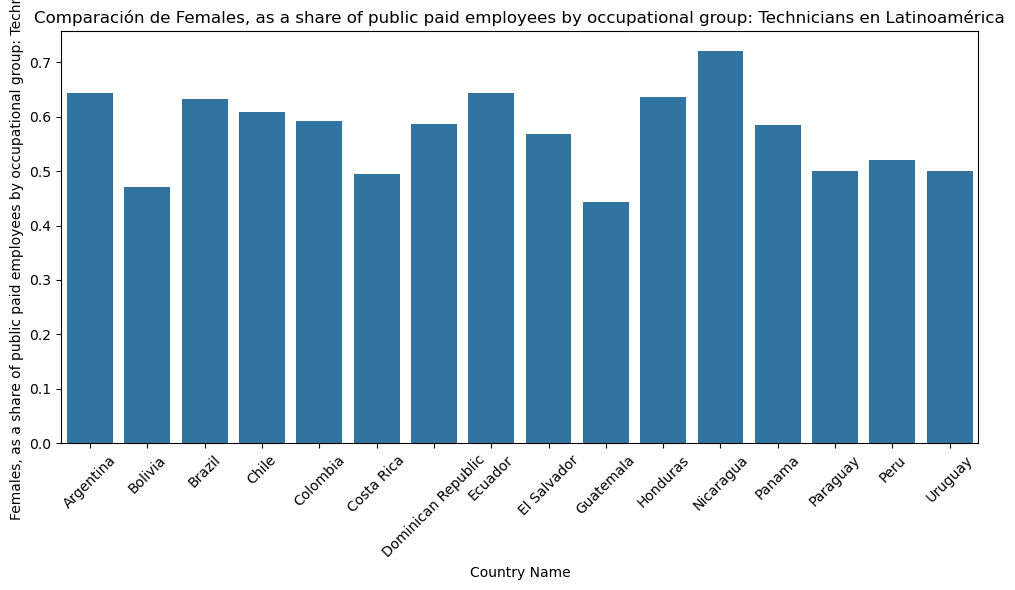

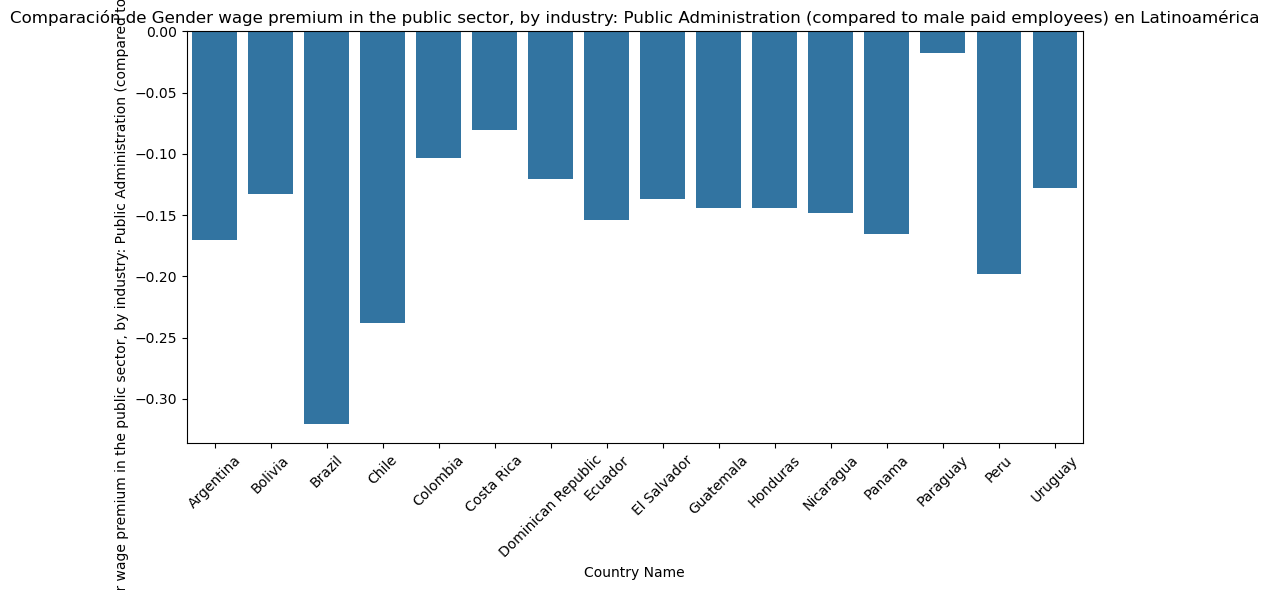

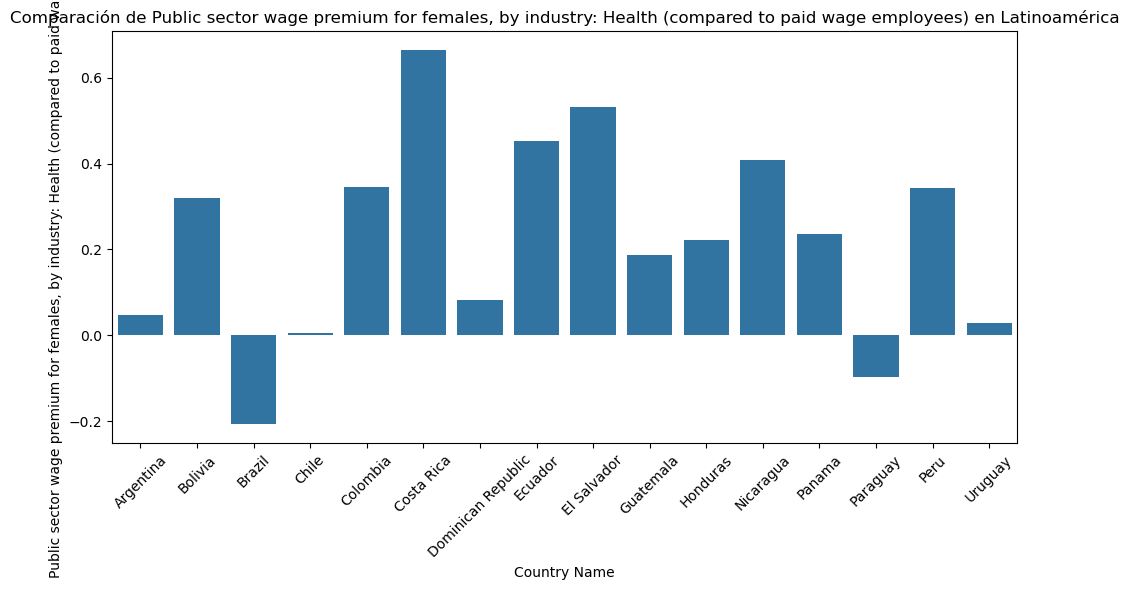

In [11]:
# crea un nuevo dataframe con los siguiente indicadores:Female to male wage ratio in the private sector (using mean), 'Female to male wage ratio in the public sector (using mean)','Females, as a share of private paid employees by occupational group: Managers', 'Females, as a share of public paid employees by industry: Education', 'Females, as a share of public paid employees by occupational group: Technicians', 'Gender wage premium in the public sector, by industry: Public Administration (compared to male paid employees)','Gender wage premium in the public sector, by industry: Public Administration (compared to male paid employees)',
# 'Gender wage premium in the public sector, by industry: Public Administration (compared to male paid employees)', 'Public sector wage premium for females, by industry: Health (compared to paid wage employees)', comparalos con los de la region de latinoamerica y realiza un barplot de los resultados

selected_indicators = [
    'Female to male wage ratio in the private sector (using mean)',
    'Females, as a share of private paid employees by occupational group: Managers',
    'Females, as a share of public paid employees by industry: Education',
    'Females, as a share of public paid employees by occupational group: Technicians',
    'Gender wage premium in the public sector, by industry: Public Administration (compared to male paid employees)',
    'Public sector wage premium for females, by industry: Health (compared to paid wage employees)'
]

#  Usa los indicadores seleccionados para analizarlos en la region de latinoamerica y desplegar los resultados en un barplot
df_selected = df_latam_genero[df_latam_genero['Indicator Name'].isin(selected_indicators)]
df_selected['Country Name'].unique()
# Imprime los indicadores unicos de df_selected
df_selected['Indicator Name'].unique()

# Obtener los años de las columnas
anios = [str(a) for a in range(2010, 2022)]

# Transformar el DataFrame a formato largo
df_long = df_selected.melt(id_vars=['Country Name', 'Indicator Name'], value_vars=anios, var_name='Year', value_name='Value')

# Pivotar el DataFrame para que los indicadores sean columnas y los países sean filas
df_pivot = df_long.pivot_table(index='Country Name', columns='Indicator Name', values='Value', aggfunc='mean')
df_pivot.reset_index(inplace=True)
# Mostrar el DataFrame pivotado
df_pivot.head()
# Crear un gráfico de barras para cada indicador
for indicator in selected_indicators:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_pivot, x='Country Name', y=indicator)
    plt.title(f'Comparación de {indicator} en Latinoamérica')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
# Guardar el gráfico como una imagen
    plt.savefig(f'{indicator}_latam_comparison.png')
    plt.close()


    




## Boxplot comparativo de los países LATAM (Country Code) para un indicador y para unaño

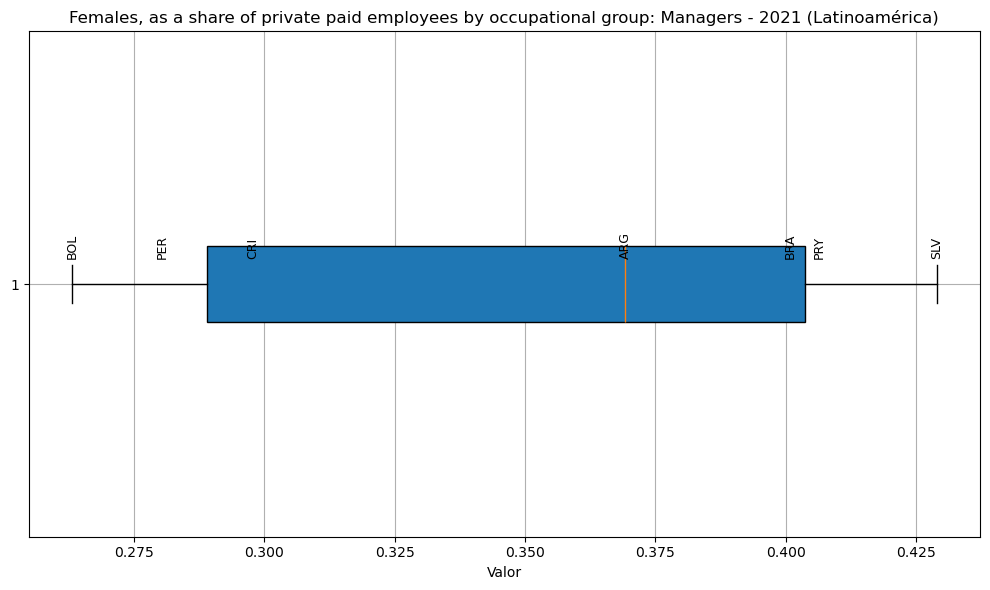

In [22]:
def get_region(country):
    for region, countries in region_map.items():
        if country in countries:
            return region
    return 'Otra'

df['region'] = df['Country Name'].apply(get_region)

# Función mejorada con anotaciones de country code
def boxplot_indicador_latam_codigos(indicador, anio):
    if str(anio) not in df.columns:
        print(f"Año {anio} no encontrado en el dataset.")
        return

    data = df[(df['Indicator Name'] == indicador) & (df['region'] == 'Latinoamerica')]
    valores = data[['Country Name', 'Country Code', str(anio)]].dropna()

    if valores.empty:
        print("No hay datos disponibles para ese indicador y año.")
        return

    plt.figure(figsize=(10, 6))
    plt.boxplot(valores[str(anio)], vert=False, patch_artist=True)

    for i, row in valores.iterrows():
        plt.text(row[str(anio)], 1.05, row['Country Code'], ha='center', va='bottom', fontsize=9, rotation=90)

    plt.title(f'{indicador} - {anio} (Latinoamérica)')
    plt.xlabel('Valor')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
boxplot_indicador_latam_codigos('Females, as a share of private paid employees by occupational group: Managers', 2021)



